In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

In [4]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


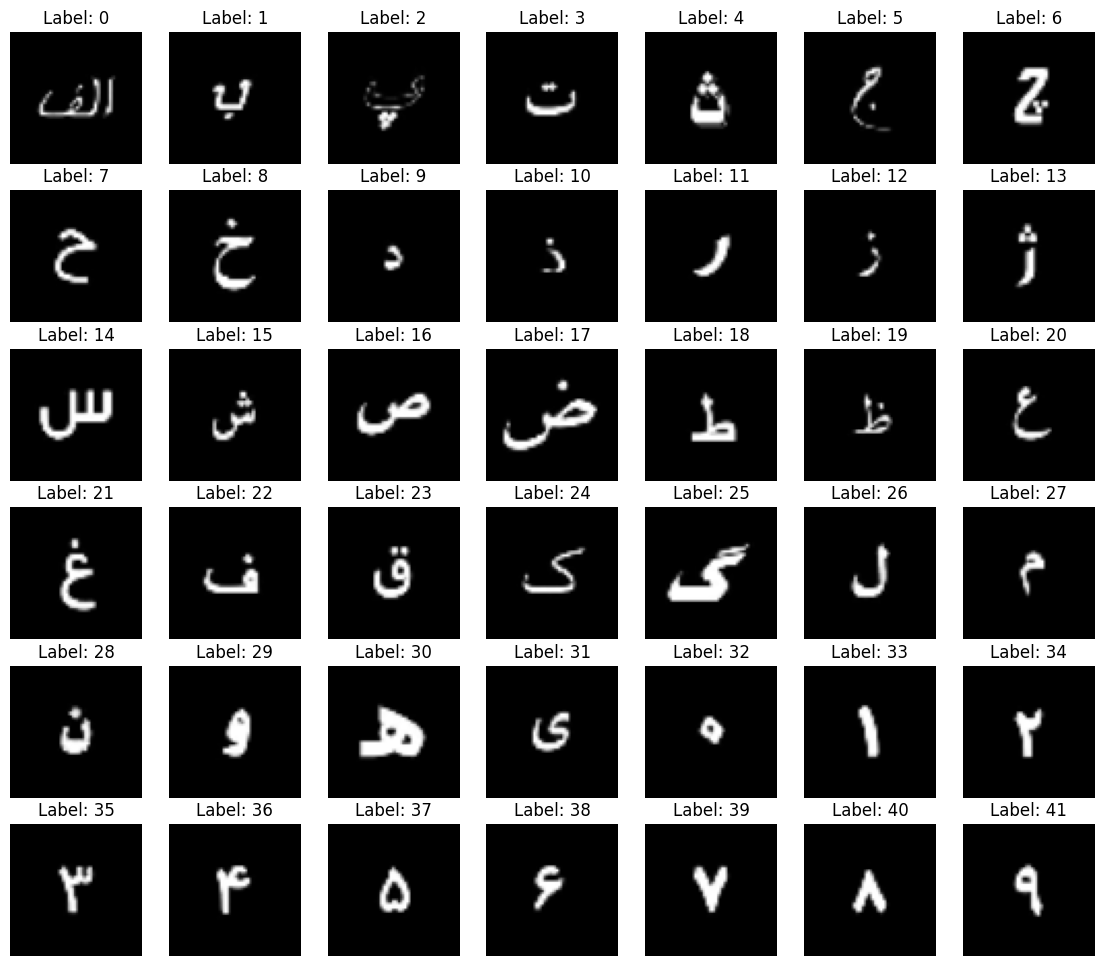

In [20]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, threshold=None, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [15]:
tree = DecisionTreeClassifier()

tree_params = {'criterion':['gini', 'entropy'],
               'max_depth':['None', 5, 10, 20],
               'min_samples_split':[2, 10, 20],
               'min_samples_leaf':[1, 5, 10]}

X_train_1d = np.array(Flatten()(X_train))
print(X_train_1d.shape)

tree_grid_srch = GridSearchCV(tree, param_grid=tree_params, verbose=2)
tree_grid_srch.fit(X_train_1d, y_train)
# print("Best Parameters:", tree_grid_srch.best_params_)

(3439, 4096)
Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END cri

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': ['None', 5, 10, 20],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]},
             verbose=2)

In [26]:
final_tree = tree_grid_srch.best_estimator_
final_tree.fit(X_train_1d, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Validation Accuracy : 0.8011627906976744


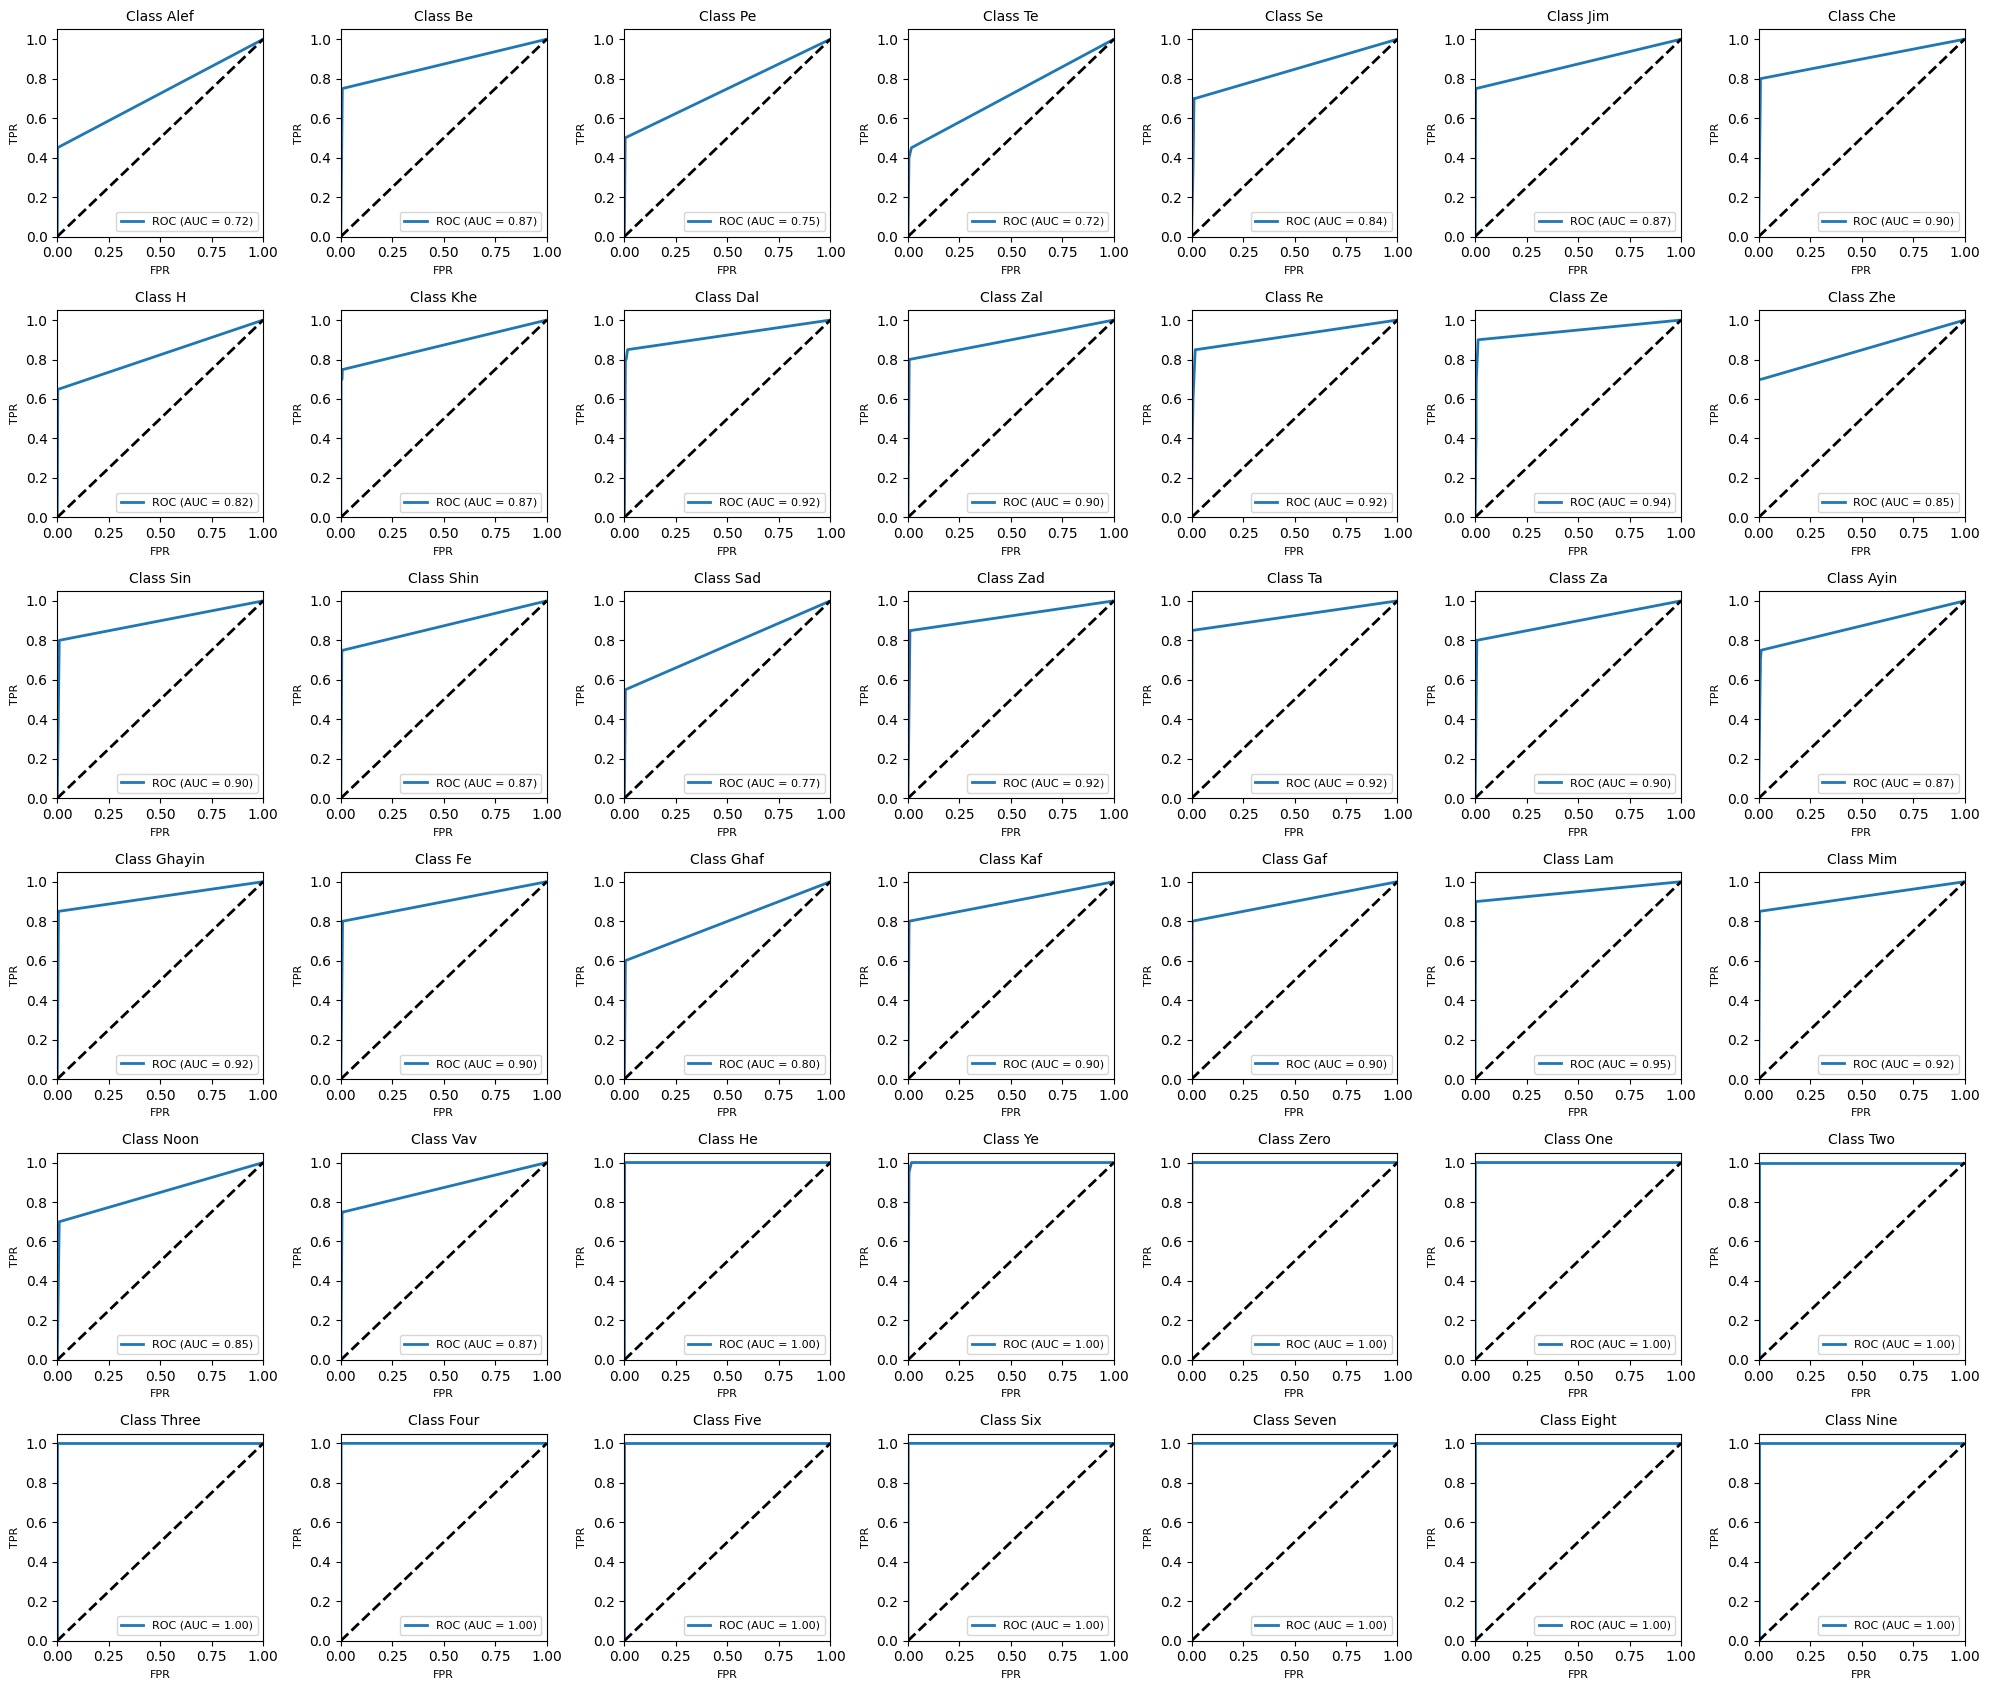

In [39]:
print(f"Validation Accuracy : {final_tree.score(X_test_1d, y_test)}")

predictions = final_tree.predict_proba(X_test_1d)

y_test_one_hot = to_categorical(y_test, num_classes=CLASSES)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(CLASSES):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


n_rows = 6  
n_cols = 7  


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 17))

axes = axes.flatten()

for i in range(CLASSES-1):
    ax = axes[i]
    ax.plot(fpr[i], tpr[i], lw=2, label=f'ROC (AUC = {roc_auc[i]:0.2f})')
    ax.plot([0, 1], [0, 1], 'k--', lw=2)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_title(f'Class {LABELS[i]}', fontsize=10)
    ax.legend(loc='lower right', fontsize=8)
    ax.set_xlabel('FPR', fontsize=8)
    ax.set_ylabel('TPR', fontsize=8)

for i in range(CLASSES, n_rows * n_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


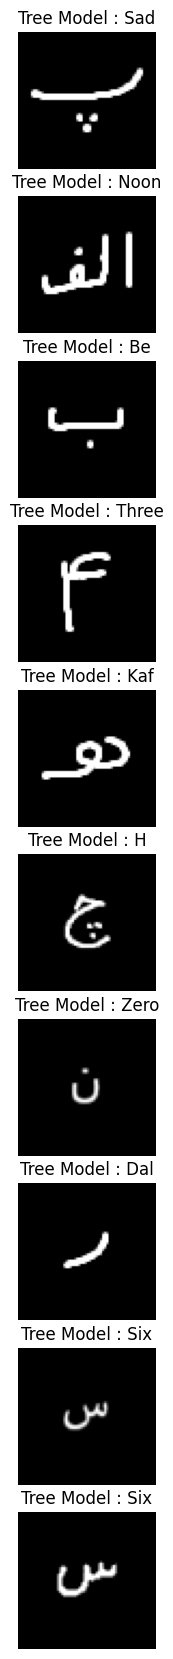

In [32]:
import os
import cv2 as cv

rows = len(os.listdir(REAL_DATA))

plt.figure(figsize=(4, 21))

for i,img_name in enumerate(os.listdir(REAL_DATA)):
    
    image_path = os.path.join(REAL_DATA, img_name)

    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

    image = dataloader.centerize(image)

    predictions_test = final_tree.predict_proba(image.reshape(1,INPUT_SHAPE[0]*INPUT_SHAPE[1]))


    plt.subplot(rows, 2, 2*i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Tree Model : {LABELS[np.argmax(predictions_test)]}')
    plt.axis('off')

plt.show()